In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# What are the features?
### TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
### Radio: advertising dollars spent on Radio
### Newspaper: advertising dollars spent on Newspaper

# What is the response?
### Sales: sales of a single product in a given market (in thousands of widgets)

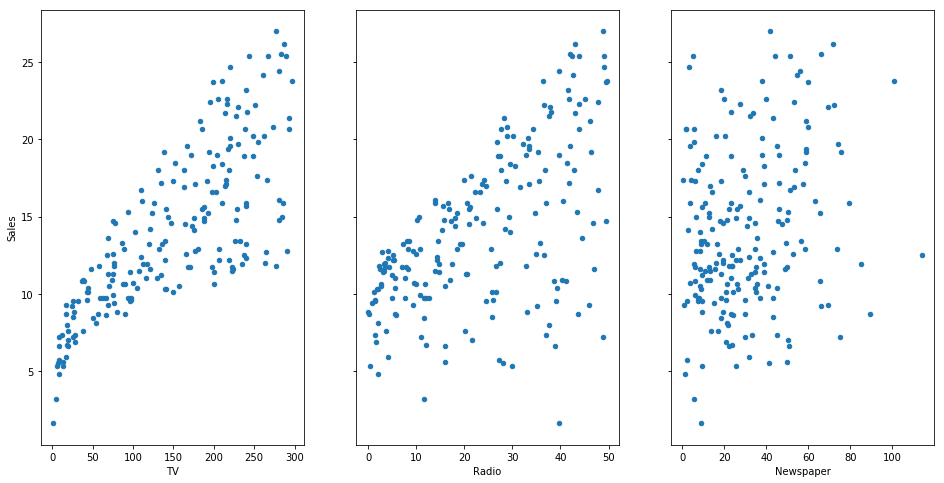

In [3]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [4]:
#This general question might lead you to more specific questions:
#Is there a relationship between ads and sales?
#How strong is that relationship?
#Which ad types contribute to sales?
#What is the effect of each ad type of sales?
#Given ad spending in a particular market, can sales be predicted?
#We will explore these questions below!

In [5]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
print "model parameters:"
print 'intercept' + '='+ str(lm.params[0])
print 'slope' + '='+ str(lm.params[1])

model parameters:
intercept=7.03259354913
slope=0.047536640433


In [6]:
#A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
#Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

In [7]:
def predict_sales(money_spent, fit_intercept, fit_slope):
    return fit_intercept + fit_slope*money_spent

In [8]:
predict_sales(50, lm.params[0],lm.params[1])

9.40942557077868

In [9]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [x*x for x in range(1,21)]})
X_new

,TV
0,1
1,4
2,9
3,16
4,25
5,36
6,49
7,64
8,81
9,100


In [10]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0      7.080130
1      7.222740
2      7.460423
3      7.793180
4      8.221010
5      8.743913
6      9.361889
7     10.074939
8     10.883061
9     11.786258
10    12.784527
11    13.877870
12    15.066286
13    16.349775
14    17.728338
15    19.201973
16    20.770683
17    22.434465
18    24.193321
19    26.047250
dtype: float64

In [11]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
preds = lm.predict(X_new)

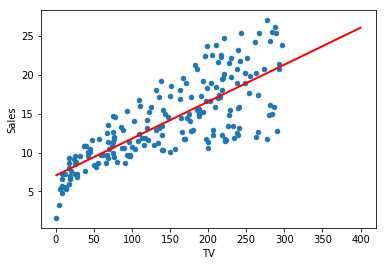

In [34]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);

In [35]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [36]:
lm.rsquared

0.61187505085007099